In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from IPython.display import display, Math, Latex

Populating the interactive namespace from numpy and matplotlib


(1)$$\begin{equation}
\Phi_{S}(R,z) = -\frac{GM}{\sqrt{R^{2} + z^{2} + a(a + 2\sqrt{z^{2} + b^{2}})}}
\end{equation}$$

donde  $$\begin{equation}
S^{2} = R^{2} + z^{2} + a(a + 2\sqrt{z^{2} + b^{2}})
\end{equation}$$
(2)

(3)$$\begin{equation}
\rho_{S} (R,z) = \frac{ab^{2}M}{4\pi S^{3}(z^{2} + b^{2})} [\frac{1}{\sqrt{z^{2} + b^{2}}} + \frac{3}{a} (1 - \frac{R^{2} + z^{2}}{S^{2}})]
\end{equation}$$

(4)$$\begin{equation}
\frac{a\Phi_{S}}{GM} = \frac{-1}{\sqrt{(R/a)^{2} + (z/a)^{2} +(1 + 2\sqrt{(z/a)^{2} + (b/a)^{2}})}}
\end{equation}$$

(5)
$$\begin{equation}
\frac{\rho_{S}4\pi a^{5}}{b^{2}M} = \frac{1}{((R/a)^{2} + (z/a)^{2} + 1+ \sqrt{(z/a)^{2} + (b/a)^{2}})^{3/2}((z/a)^{2} + (b/a)^{2})}[\frac{1}{\sqrt{(z/a)^{2} + (b/a)^{2}}} + 3 (1- \frac{(R/a)^{2} + (z/a)^{2}}{(R/a)^{2} + 1 + 2\sqrt{(z/a)^{2} + (b/a)^{2}}})]
\end{equation}$$

In [2]:
#función de la densidad adimencional, ec (5)
def densidad_ad(R,z,a,b):
    d1 = ((R/a)**2. + (z/a)**2. + 1. + np.sqrt((z/a)**2. + (b/a)**2.))**(3./2.)
    t2 = 1/np.sqrt((z/a)**2. + (b/a)**2.)
    t3 = 3.*(1. - ((R/a)**2. + (z/a)**2.)/((R/a)**2. + 1. + 2.*np.sqrt((z/a)**2. + (b/a)**2.)))
    rho_ad = (1./d1)*t2*t3
    return rho_ad

In [3]:
#función del potencial adimencional, ec(4)
def potencial_ad(R,z,a,b):
    d = np.sqrt((R/a)**2. + (z/a)**2. + 1. + 2.*np.sqrt((z/a)**2. + (b/a)**2.))
    phi_ad = -1./d
    return phi_ad

In [45]:
R = np.linspace(-15.,15,100)
z = np.linspace(-15.,15.,100)

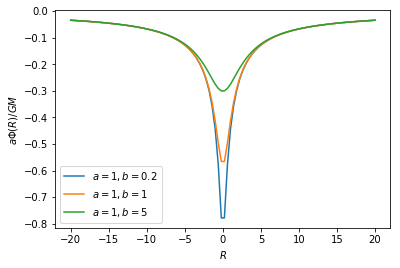

In [30]:
#grafica del potencial adimencional con distintos valores de b
plt.plot(R, potencial_ad(R,z,a=1,b=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, potencial_ad(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R, potencial_ad(R,z,a=1.,b=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$a\Phi (R)/GM$')
plt.legend(loc='lower left', prop={'size':10})
plt.show()

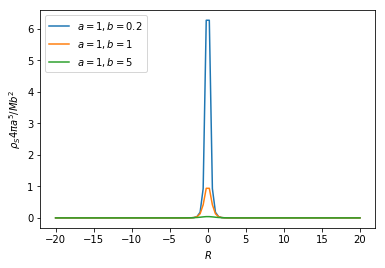

In [31]:
#grafica de la densidad adimencional a distintos valorers de b
plt.plot(R, densidad_ad(R,z,a=1,b=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, densidad_ad(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R, densidad_ad(R,z,a=1.,b=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{S} 4\pi a^{5}/Mb^{2}$')
plt.legend(loc='upper left', prop={'size':10})
plt.show()

In [32]:
#funcion de la densidad
def densidad(R,z,a,b):
    K = (M*b**2.)/(4.*np.pi*a**5.)
    rho = K*densidad_ad(R,z,a,b)
    return rho

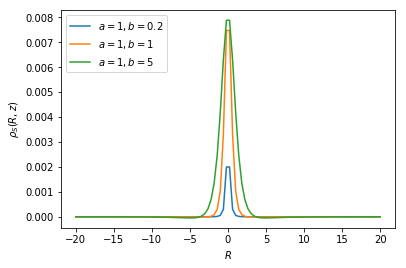

In [33]:
M=0.1#
plt.plot(R, densidad(R,z,a=1,b=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, densidad(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R, densidad(R,z,a=1.,b=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{S}(R,z)$')
plt.legend(loc='upper left', prop={'size':10})
plt.show()

In [34]:
#función del potencial
def potencial(R,z,a,b):
    K = (G*M)/a
    phi = K*potencial_ad(R,z,a,b)
    return phi

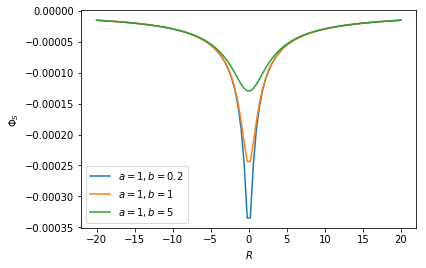

In [35]:
G = 4.302e-3 #pcSM(km/s)**2
plt.plot(R, potencial(R,z,a=1.,b=0.2),label=r'$a = 1, b = 0.2$')
plt.plot(R, potencial(R,z,a=1.,b=1.),label=r'$a = 1, b = 1$')
plt.plot(R, potencial(R,z,a=1.,b=5.),label=r'$a = 1, b = 5$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\Phi_{S}$')
plt.legend(loc='lower left', prop={'size':10})
plt.show()

In [46]:
#Realiza una matriz de coordenadas formados por R y z 
R_1,z_1 = np.meshgrid(R,z)

In [47]:
print np.min(densidad_ad(R_1,z_1,a=1.,b=0.2)),np.max(densidad_ad(R_1,z_1,a=1.,b=0.2))

-0.006574964477906519 7.85234035055616


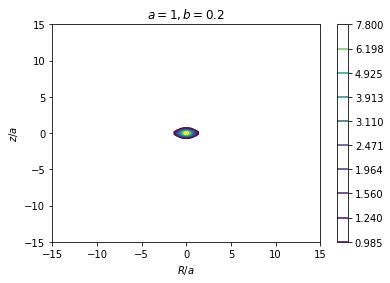

In [49]:
levels=10**np.linspace(-0.0065,np.log10(7.8),10)
fig, ax = plt.subplots()
lm = ax.contour(R_1,z_1,densidad_ad(R_1,z_1,a=1.,b=0.2),levels=levels)
plt.colorbar(lm)
xlabel(r'$R/a$')
ylabel(r'$z/a$')
plt.title(r'$a = 1, b=0.2$')
plt.show()

In [39]:
print np.min(densidad_ad(R_1,z_1,a=1.,b=1.)),np.max(densidad_ad(R_1,z_1,a=1.,b=1.))

-0.005604049110011188 0.9394633125256577


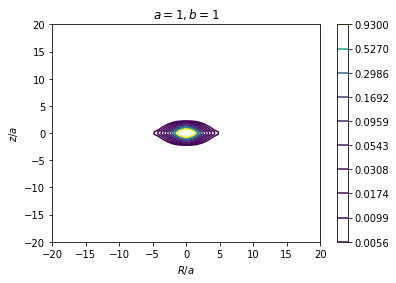

In [44]:
levels=10**np.linspace(np.log10(0.00),np.log10(0.93),10)
fig, ax = plt.subplots()
lm = ax.contour(R_1,z_1,densidad_ad(R_1,z_1,a=1.,b=0.2),levels=levels)
plt.colorbar(lm)
xlabel(r'$R/a$')
ylabel(r'$z/a$')
plt.title(r'$a = 1, b=1$')
plt.show()

In [40]:
print np.min(densidad_ad(R_1,z_1,a=1.,b=5.)),np.max(densidad_ad(R_1,z_1,a=1.,b=5.))

-0.0015131445235606166 0.0396378932028803


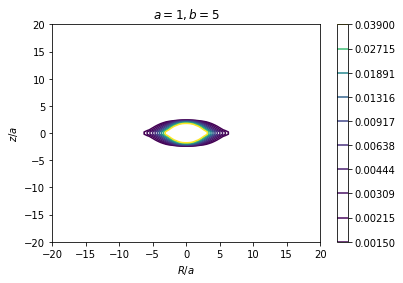

In [43]:
levels=10**np.linspace(np.log10(0.0015),np.log10(0.039),10)
fig, ax = plt.subplots()
lm = ax.contour(R_1,z_1,densidad_ad(R_1,z_1,a=1.,b=0.2),levels=levels)
plt.colorbar(lm)
xlabel(r'$R/a$')
ylabel(r'$z/a$')
plt.title(r'$a = 1, b=5$')
plt.show()